<a href="https://colab.research.google.com/github/Masoud-Ghasemian/Air_Pollution_forecastion_LSTM_Keras/blob/master/PyTorch_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

In [0]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3. , requires_grad=True)



y =  w * x +  b

y.backward()

print(x.grad)
print(w.grad)
print(b.grad)


tensor(2.)
tensor(1.)
tensor(1.)


In [0]:
x = torch.randn(10, 3)
y = torch.randn(10, 2)

linear = nn.Linear(3, 2)
print('w: ', linear.weight)
print('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.4895, -0.1312, -0.1120],
        [ 0.4804,  0.4763,  0.3897]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.5255, -0.4618], requires_grad=True)


In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [0]:
pred = linear(x)

In [0]:
pred

tensor([[ 0.7541, -0.2833],
        [-0.1426,  0.4465],
        [ 0.1803, -1.6577],
        [ 0.4244, -1.3273],
        [ 1.0150, -0.1266],
        [ 1.7812, -1.0279],
        [ 1.4861,  0.7485],
        [ 0.1377,  0.0383],
        [ 1.3622,  0.2382],
        [ 0.1684,  0.3088]], grad_fn=<AddmmBackward>)

In [0]:
loss = criterion(pred, y)
print('loss', loss.item())


loss 1.8461107015609741


In [0]:
loss.backward()

In [0]:
print('dL/dw: ', linear.weight.grad)
print('dL/db: ', linear.bias.grad)


dL/dw:  tensor([[ 0.7466,  0.1449, -0.7943],
        [-0.0495,  0.8012,  1.0679]])
dL/db:  tensor([1.1722, 0.1133])


In [0]:
optimizer.step()

In [0]:
pred = linear(x)
loss = criterion(pred, y)
print('loss after one step optimization: ', loss.item())

loss after one step optimization:  1.8026520013809204


In [0]:
x = np.array([[1,2], [3,4]])
x

array([[1, 2],
       [3, 4]])

In [0]:
y = torch.from_numpy(x)

In [0]:
y

tensor([[1, 2],
        [3, 4]])

In [0]:
z = y.numpy()

In [0]:
z

array([[1, 2],
       [3, 4]])

In [0]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train = True, transform = transforms.ToTensor(), download = True)

Files already downloaded and verified


In [0]:
image , label = train_dataset[0]

In [0]:
print(image.size())

torch.Size([3, 32, 32])


In [0]:
print(label)

6


In [0]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 64, shuffle = True)

In [0]:
data_iter = iter(train_loader)

In [0]:
images, labels = data_iter.next()

In [0]:
images.shape

torch.Size([64, 3, 32, 32])

In [0]:
resent = torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [0]:
for param in resent.parameters():
  param.requires_grad = False

In [0]:
resent.fc = nn.Linear(resent.fc.in_features, 100)

In [0]:
images = torch.randn(64, 3, 224, 224)
outputs = resent(images)
print(outputs.size())

torch.Size([64, 100])


In [0]:
torch.save(resent, 'model.ckpt')
model = torch.load('model.ckpt')


In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [0]:
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [0]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [0]:
model = nn.Linear(in_features= input_size, out_features=output_size)

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

Epoch [5/60], Loss: 1.5299
Epoch [10/60], Loss: 0.7231
Epoch [15/60], Loss: 0.3963
Epoch [20/60], Loss: 0.2639
Epoch [25/60], Loss: 0.2102
Epoch [30/60], Loss: 0.1885
Epoch [35/60], Loss: 0.1797
Epoch [40/60], Loss: 0.1761
Epoch [45/60], Loss: 0.1746
Epoch [50/60], Loss: 0.1740
Epoch [55/60], Loss: 0.1738
Epoch [60/60], Loss: 0.1737


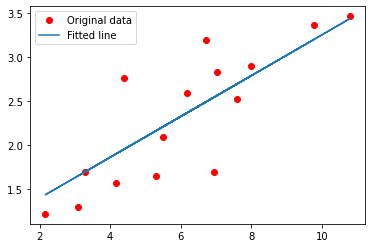

In [0]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

In [0]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [0]:
# Hyper-parameters
input_size = 28 * 28  # 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001


In [0]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = True,
                                           transform = transforms.ToTensor(),
                                           download = True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw





Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw


Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw


Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw


Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw
Processing...
Done!


In [0]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [0]:
# logistic regression model
model = nn.Linear(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)



In [0]:
# Train Model
total_step = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, input_size)
    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if (i+1) % 100 == 0:
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
      .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 2.1584
Epoch [1/5], Step [200/600], Loss: 2.0355
Epoch [1/5], Step [300/600], Loss: 2.0045
Epoch [1/5], Step [400/600], Loss: 1.9083
Epoch [1/5], Step [500/600], Loss: 1.8263
Epoch [1/5], Step [600/600], Loss: 1.7718
Epoch [2/5], Step [100/600], Loss: 1.7841
Epoch [2/5], Step [200/600], Loss: 1.6434
Epoch [2/5], Step [300/600], Loss: 1.5468
Epoch [2/5], Step [400/600], Loss: 1.5162
Epoch [2/5], Step [500/600], Loss: 1.4707
Epoch [2/5], Step [600/600], Loss: 1.4310
Epoch [3/5], Step [100/600], Loss: 1.4578
Epoch [3/5], Step [200/600], Loss: 1.4780
Epoch [3/5], Step [300/600], Loss: 1.3575
Epoch [3/5], Step [400/600], Loss: 1.2589
Epoch [3/5], Step [500/600], Loss: 1.3421
Epoch [3/5], Step [600/600], Loss: 1.2209
Epoch [4/5], Step [100/600], Loss: 1.1779
Epoch [4/5], Step [200/600], Loss: 1.2282
Epoch [4/5], Step [300/600], Loss: 1.1513
Epoch [4/5], Step [400/600], Loss: 1.1510
Epoch [4/5], Step [500/600], Loss: 1.1100
Epoch [4/5], Step [600/600], Loss:

In [0]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the model on the 10000 test images: 82 %


/pytorch/aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


In [0]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [0]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [0]:
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [5]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw


Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw


Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw


Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw
Processing...




Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out